In [40]:
#увеличим дефолтный размер графиков
from pylab import rcParams
rcParams['figure.figsize'] = 10,7

# импортируем нужные библиотеки
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
data = pd.read_csv('pogoda.csv')
data.head
#  в файле data есть столбцы с отсутствующими значениями , поэтому эти столбцы убираем для корректной работы
data.drop(['Атмосферное давление','Осадки'], axis='columns', inplace=True)
data = data.dropna()
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 360 entries, 0 to 360
Data columns (total 6 columns):
Дата                        360 non-null object
Максимальная температура    360 non-null float64
Минимальная температура     360 non-null float64
Средняя температура         360 non-null float64
Скорость ветра              360 non-null int64
Эффективная температура     360 non-null float64
dtypes: float64(4), int64(1), object(1)
memory usage: 19.7+ KB


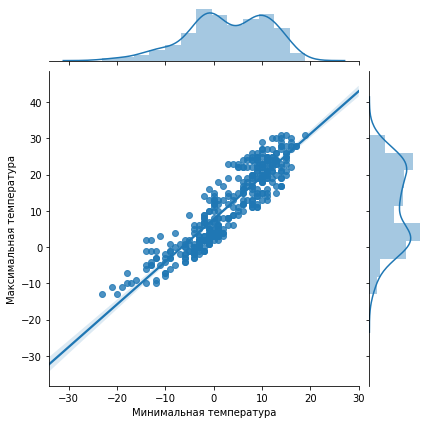

In [45]:
page_url = 'http://pogoda-service.ru/archive_gsod_res.php?country=RS&station=\
370008&datepicker_beg=01.01.2019&datepicker_end=31.12.2019&bsubmit=\
%D0%9F%D0%BE%D1%81%D0%BC%D0%BE%D1%82%D1%80%D0%B5%D1%82%D1%8C'
pogoda = pd.read_html(page_url, attrs = {'class': 'table_res'}, encoding='utf-8')[0]
# удаляем в таблице стобцы с отсутствующими значениями
pogoda.drop(['Атмосферное давление','Осадки'], axis='columns', inplace=True)
pogoda = pogoda.dropna()
pogoda
# pogoda.info()
# 1 на основании ниже указанного графика можем предположить , что большую часть года погода в диапозоне от "-5" до "15" градусов
#pogoda.plot.scatter(x='Минимальная температура' , y='Максимальная температура')

# 2 на следующего графика мы можем понять какая скорость ветра бывает в Ирландии(в среднем около 3 метров в секунду по году)
#pogoda_veter = pogoda.sort_values('Скорость ветра')['Скорость ветра'].value_counts()
#pogoda_veter.plot(kind='pie', y='Скорость ветра')

# 3 на этом же графике мы видим, средняя скорость ветра составляет около 4 метров в секунду, что говорит нам о неточности "пирога"
#pogoda['veter'] = pogoda['Скорость ветра'].map(int)
#pogoda['veter'].plot(kind='box')

# 4 на этом графике мы видим зависимость скорость ветра от средней температуры
#sns_plot = sns.pairplot(pogoda[['Средняя температура', 'Скорость ветра']])
#sns_plot

#5 благодаря графику отношений мин и макс температур по году, мы получаем усредненную температуру по году(медиану), 
#в дальнейшем эту медиану можно  сравнить с медианой по погоде 100 лет назад, и на основании этого сделать 
#вывод рассматриваемый год жарче или холоднее
sns.jointplot(x='Минимальная температура', y='Максимальная температура', 
              data=pogoda, kind='reg')
